In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

2024-06-30 23:53:16.386952: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [93]:
import tensorflow as tf
import os
import nrrd
import pickle

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'
CAPATH='/raid/mpsych/CACTAS/DATA/CA24'

In [5]:
numbers = [13,55,18,60,35,33,95,61,6,39,2,66,17,48,24,96,91,14,52,11,46,42,65,25,45,64,84,21,57,92,75,83,69,26,79,82,97,88,29,32,51,72]

In [6]:
images = []
labels= []
masks = []

In [7]:
for num in numbers:
    img_file = os.path.join(DATAPATH, f'{num}.img.nrrd')
    img_file2 = os.path.join(DATAPATH, f'{num}.b.img.nrrd')
    
    labl_file = os.path.join(DATAPATH,f'{num}.b.seg.nrrd')
    
    seg_file = os.path.join(CAPATH, f'{num}.ca.seg.nrrd')


    # Check if the img file exists
    if os.path.isfile(img_file):
        images.append(os.path.basename(img_file))
    
    # Check if the secondary img file exists
    if os.path.isfile(img_file2):
        images.append(os.path.basename(img_file2))
        
    if os.path.isfile(labl_file):
        labels.append(os.path.basename(labl_file))
    
    # Check if the seg file exists
    if os.path.isfile(seg_file):
        masks.append(os.path.basename(seg_file))

In [8]:
len(images), len(labels), len(masks)

(42, 42, 42)

In [9]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.split_patients_masks(images, labels, masks)

In [10]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.normalization2(DATAPATH, CAPATH, X_train, y_train, m_train, X_test, y_test, m_test)

In [11]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key_fulldata(y_train)

6817


In [12]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(8523, 512, 512, 1) (8523, 512, 512, 1) (2149, 512, 512, 1) (2149, 512, 512, 1)


In [13]:
m_train, m_test = C.Helper.extract_CAmasks_slices(m_train, m_test)

(8523, 512, 512, 1) (2149, 512, 512, 1)


In [206]:
#X_train.dtype, y_train.dtype, m_train.dtype, X_test.dtype, y_test.dtype, m_test.dtype

In [207]:
#np.unique(m_train)

In [208]:
#np.unique(m_test)

In [19]:
X_train_set = X_train[:last_key]
y_train_set = m_train[:last_key]
X_val = X_train[last_key:]
y_val = m_train[last_key:]

In [23]:
model = C.Helper.create_unet(X_train_set[0].shape)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


2024-07-01 00:01:43.980329: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-07-01 00:01:44.166581: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-07-01 00:01:44.169325: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-07-01 00:01:44.169350: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-07-01 00:01:44.173433: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-07-01 

In [24]:
model, history = C.Helper.train_unet(X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2024-07-01 00:01:49.721775: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-07-01 00:01:49.742822: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245740000 Hz


Epoch 1/200


2024-07-01 00:01:51.340800: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-07-01 00:01:52.090132: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2024-07-01 00:01:52.830223: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2024-07-01 00:01:52.830249: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-07-01 00:01:52.830312: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-07-01 00:01:52.908195: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-07-01 00:01:53.650190: I tensorflow/stream_exec

426/426 [==============================] - 208s 458ms/step - loss: 0.1488 - iou: 6.1390e-04 - iou_thresholded: 6.4943e-04 - val_loss: 0.0106 - val_iou: 7.1949e-04 - val_iou_thresholded: 0.5517
Epoch 2/200
426/426 [==============================] - 194s 450ms/step - loss: 0.0056 - iou: 0.0244 - iou_thresholded: 0.1505 - val_loss: 0.0038 - val_iou: 0.0494 - val_iou_thresholded: 0.6013
Epoch 3/200
426/426 [==============================] - 191s 449ms/step - loss: 0.0023 - iou: 0.0909 - iou_thresholded: 0.3607 - val_loss: 0.0027 - val_iou: 0.0939 - val_iou_thresholded: 0.4869
Epoch 4/200
426/426 [==============================] - 191s 449ms/step - loss: 0.0014 - iou: 0.1635 - iou_thresholded: 0.4429 - val_loss: 0.0022 - val_iou: 0.0944 - val_iou_thresholded: 0.6017
Epoch 5/200
426/426 [==============================] - 191s 449ms/step - loss: 0.0011 - iou: 0.2406 - iou_thresholded: 0.5127 - val_loss: 0.0020 - val_iou: 0.1164 - val_iou_thresholded: 0.5267
Epoch 6/200
426/426 [==============

426/426 [==============================] - 191s 449ms/step - loss: 8.7207e-05 - iou: 0.8828 - iou_thresholded: 0.9170 - val_loss: 0.0030 - val_iou: 0.3550 - val_iou_thresholded: 0.6733
Epoch 43/200
426/426 [==============================] - 191s 449ms/step - loss: 8.4478e-05 - iou: 0.8859 - iou_thresholded: 0.9187 - val_loss: 0.0031 - val_iou: 0.3922 - val_iou_thresholded: 0.6688
Epoch 44/200
426/426 [==============================] - 191s 449ms/step - loss: 7.9963e-05 - iou: 0.8910 - iou_thresholded: 0.9220 - val_loss: 0.0026 - val_iou: 0.2801 - val_iou_thresholded: 0.6468
Epoch 45/200
426/426 [==============================] - 191s 449ms/step - loss: 8.2071e-05 - iou: 0.8870 - iou_thresholded: 0.9195 - val_loss: 0.0031 - val_iou: 0.4333 - val_iou_thresholded: 0.6614
Epoch 46/200
426/426 [==============================] - 191s 449ms/step - loss: 9.7835e-05 - iou: 0.8734 - iou_thresholded: 0.9092 - val_loss: 0.0030 - val_iou: 0.3954 - val_iou_thresholded: 0.6552
Epoch 47/200
426/426 [=

426/426 [==============================] - 191s 449ms/step - loss: 5.1680e-05 - iou: 0.9287 - iou_thresholded: 0.9497 - val_loss: 0.0035 - val_iou: 0.4903 - val_iou_thresholded: 0.6747
Epoch 84/200
426/426 [==============================] - 191s 449ms/step - loss: 5.1621e-05 - iou: 0.9267 - iou_thresholded: 0.9483 - val_loss: 0.0037 - val_iou: 0.5509 - val_iou_thresholded: 0.6772
Epoch 85/200
426/426 [==============================] - 191s 449ms/step - loss: 4.9228e-05 - iou: 0.9300 - iou_thresholded: 0.9507 - val_loss: 0.0039 - val_iou: 0.5416 - val_iou_thresholded: 0.6621
Epoch 86/200
426/426 [==============================] - 191s 449ms/step - loss: 4.7110e-05 - iou: 0.9325 - iou_thresholded: 0.9524 - val_loss: 0.0040 - val_iou: 0.5629 - val_iou_thresholded: 0.6708
Epoch 87/200
426/426 [==============================] - 191s 449ms/step - loss: 4.4252e-05 - iou: 0.9356 - iou_thresholded: 0.9550 - val_loss: 0.0040 - val_iou: 0.5556 - val_iou_thresholded: 0.6788
Epoch 88/200
426/426 [=

426/426 [==============================] - 191s 449ms/step - loss: 3.8239e-05 - iou: 0.9467 - iou_thresholded: 0.9621 - val_loss: 0.0040 - val_iou: 0.5447 - val_iou_thresholded: 0.6476
Epoch 125/200
426/426 [==============================] - 191s 449ms/step - loss: 3.6128e-05 - iou: 0.9437 - iou_thresholded: 0.9617 - val_loss: 0.0040 - val_iou: 0.5797 - val_iou_thresholded: 0.6586
Epoch 126/200
426/426 [==============================] - 191s 449ms/step - loss: 3.6302e-05 - iou: 0.9480 - iou_thresholded: 0.9629 - val_loss: 0.0043 - val_iou: 0.6068 - val_iou_thresholded: 0.6539
Epoch 127/200
426/426 [==============================] - 191s 449ms/step - loss: 3.6053e-05 - iou: 0.9489 - iou_thresholded: 0.9639 - val_loss: 0.0042 - val_iou: 0.6059 - val_iou_thresholded: 0.6653
Epoch 128/200
426/426 [==============================] - 191s 449ms/step - loss: 3.3105e-05 - iou: 0.9506 - iou_thresholded: 0.9659 - val_loss: 0.0042 - val_iou: 0.6023 - val_iou_thresholded: 0.6599
Epoch 129/200
426/4

426/426 [==============================] - 191s 449ms/step - loss: 2.7118e-05 - iou: 0.9612 - iou_thresholded: 0.9731 - val_loss: 0.0043 - val_iou: 0.6015 - val_iou_thresholded: 0.6416
Epoch 166/200
426/426 [==============================] - 191s 449ms/step - loss: 2.6543e-05 - iou: 0.9613 - iou_thresholded: 0.9730 - val_loss: 0.0047 - val_iou: 0.6202 - val_iou_thresholded: 0.6480
Epoch 167/200
426/426 [==============================] - 191s 449ms/step - loss: 2.6481e-05 - iou: 0.9624 - iou_thresholded: 0.9737 - val_loss: 0.0045 - val_iou: 0.6080 - val_iou_thresholded: 0.6566
Epoch 168/200
426/426 [==============================] - 191s 449ms/step - loss: 2.6311e-05 - iou: 0.9628 - iou_thresholded: 0.9742 - val_loss: 0.0045 - val_iou: 0.5952 - val_iou_thresholded: 0.6492
Epoch 169/200
426/426 [==============================] - 191s 449ms/step - loss: 2.5551e-05 - iou: 0.9626 - iou_thresholded: 0.9735 - val_loss: 0.0046 - val_iou: 0.6118 - val_iou_thresholded: 0.6607
Epoch 170/200
426/4

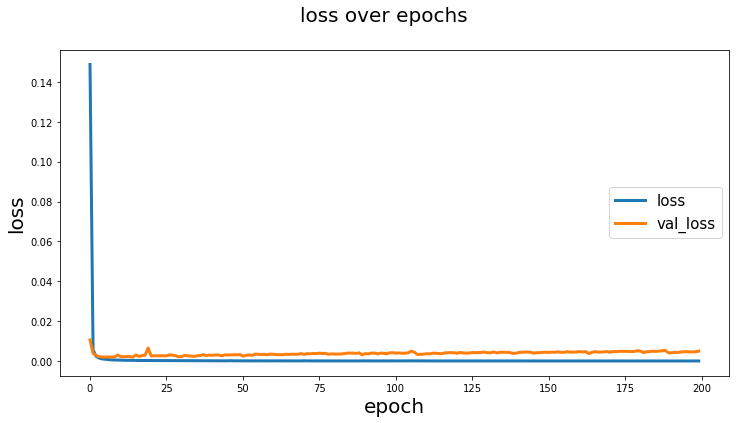

In [25]:
C.Helper.visualize_graph(history)

In [26]:
y_pred = C.Helper.prediction(X_test, model)

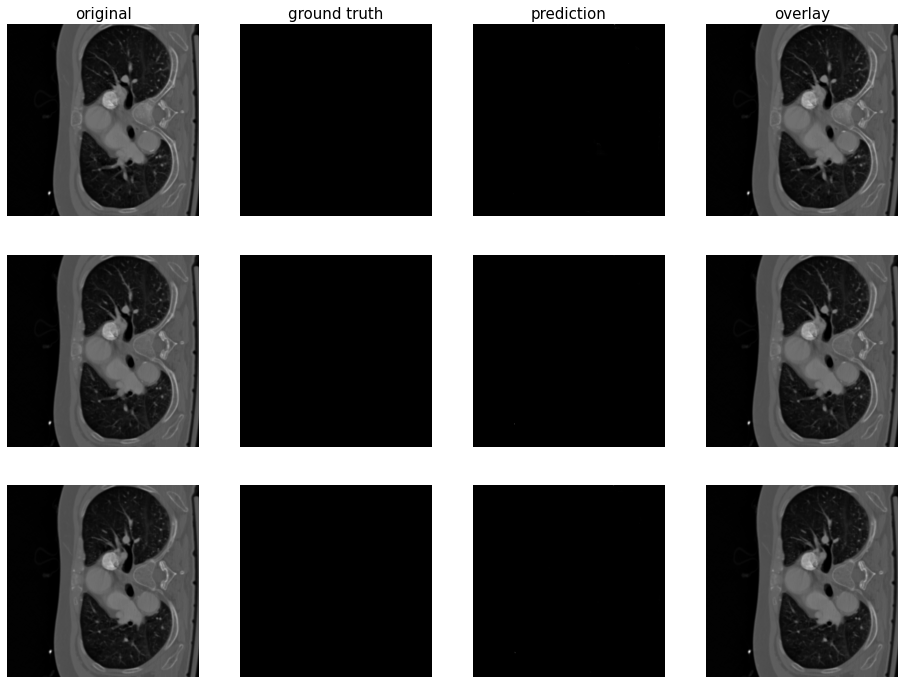

In [38]:
C.Helper.visualize_result(X_test, m_test, y_pred)

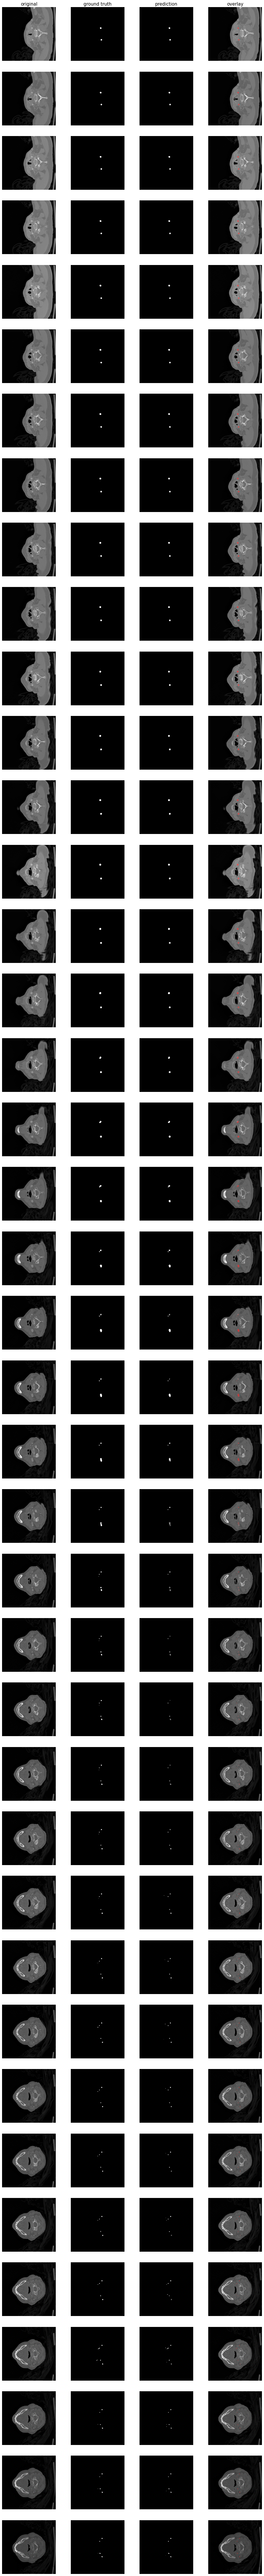

In [41]:
C.Helper.visualize_result_limit(X_test, m_test, y_pred, start_index=80, end_index=120)

In [39]:
C.Helper.evaluate(X_test, m_test, model)

68/68 [==============================] - 17s 253ms/step - loss: 0.0021 - iou: 0.6269 - iou_thresholded: 0.6793


In [46]:
#model.save('/raid/mpsych/CACTAS/DATA/HISTORY/CA_unet_v1.h5')

In [ ]:
######### TEST bad CA segments ##############

In [44]:
test_nums=[47,16,50,71,86,77,73,53,62,90,36,23,10,27,15,7,9,93,94,87,40,22,63,41,31,49,12,5]

In [45]:
len(test_nums)

28

In [51]:
test_images=[]

In [52]:
for num in test_nums:
    img_file = os.path.join(DATAPATH, f'{num}.img.nrrd')
    img_file2 = os.path.join(DATAPATH, f'{num}.b.img.nrrd')

    # Check if the img file exists
    if os.path.isfile(img_file):
        test_images.append(os.path.basename(img_file))
    
    # Check if the secondary img file exists
    if os.path.isfile(img_file2):
        test_images.append(os.path.basename(img_file2))

In [54]:
len(test_images)

28

In [55]:
norm_test_images=[]

In [57]:
for file in test_images:
    data, header = nrrd.read(DATAPATH + "/" +file)
    normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))
    norm_test_images.append(normalized_data)

In [58]:
len(norm_test_images)

28

In [75]:
slices_per_patient_train = [img.shape[2] for img in norm_test_images]

In [205]:
#slices_per_patient_train

In [59]:
slices = []
for i in range(len(norm_test_images)):
    for z in range(norm_test_images[i].shape[2]):
        slice_2d = norm_test_images[i][:, :, z]
        slices.append(slice_2d)
X_train_array = np.array(slices)

In [115]:
#X_train_arrays = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1],X_train_array.shape[2])

In [179]:
X_train_arrays.shape

(6094, 512, 512)

In [172]:
test_pred = model.predict(X_train_arrays)

In [118]:
def visualize_result_limit(X_val, y_pred, start_index=100, end_index=110):
    from keras_unet.utils import plot_imgs

    # Create dummy mask images to avoid NoneType issues
    dummy_mask = np.zeros_like(y_pred[start_index:end_index])

    plot_imgs(
        org_imgs=X_val[start_index:end_index],
        mask_imgs=dummy_mask,
        pred_imgs=y_pred[start_index:end_index],
        nm_img_to_plot=end_index - start_index
    )

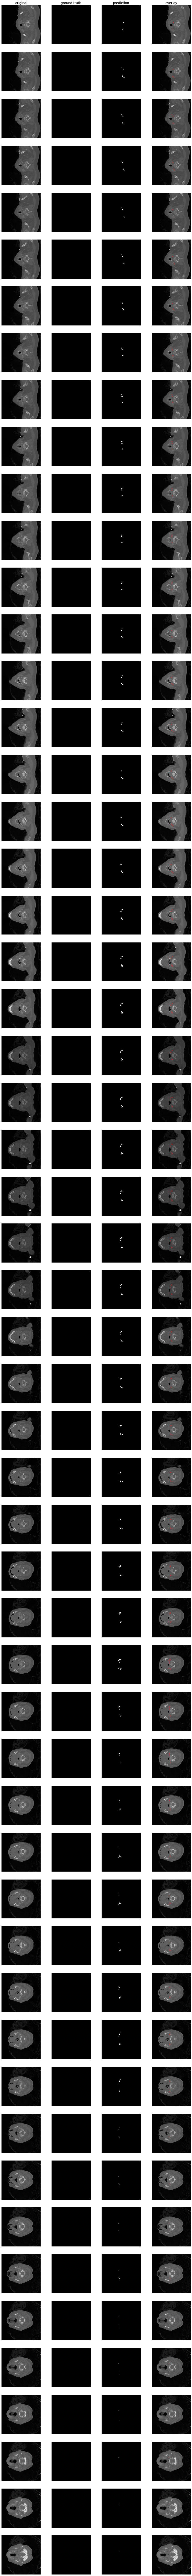

In [167]:
visualize_result_limit(X_train_arrays, test_pred, start_index=70, end_index=125)

In [173]:
# Initialize an empty list to hold the 3D images
three_d_images = []

# Current index in the slices array
current_index = 0

In [174]:
for count in slices_per_patient_train:
    # Extract the slices for the current 3D image
    three_d_image = test_pred[current_index:current_index + count]
    
    # Append the 3D image to the list
    three_d_images.append(three_d_image)
    
    # Update the current index
    current_index += count

In [175]:
three_d_images = np.array(three_d_images)

/tmp/ipykernel_1924549/1642707291.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  three_d_images = np.array(three_d_images)


In [176]:
three_d_images[0].shape

(193, 512, 512, 1)

In [180]:
three_d_images = [image.reshape(image.shape[0], image.shape[1], image.shape[2]) for image in three_d_images]

In [182]:
three_d_images[0].shape

(193, 512, 512)

In [195]:
CA_TEST='/raid/mpsych/CACTAS/DATA/CA_test/'

In [184]:
for idx, (image_3d, test_num) in enumerate(zip(three_d_images, test_nums)):
    nrrd_filename = os.path.join(CA_TEST, f'{test_num}.ca.seg.nrrd')
    nrrd.write(nrrd_filename, image_3d)

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D

from skimage import measure
from skimage.draw import ellipsoid

In [196]:
seg = C.Helper.load_seg_data(CA_TEST)

47.ca.seg.nrrd


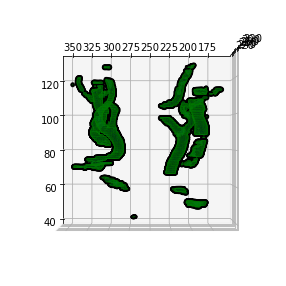

16.ca.seg.nrrd


50.ca.seg.nrrd


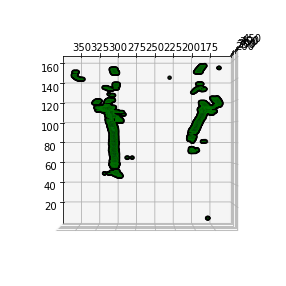

7.ca.seg.nrrd


9.ca.seg.nrrd


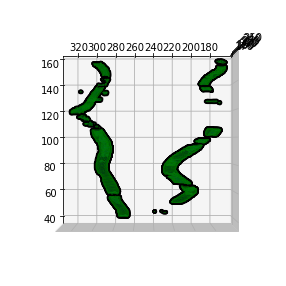

71.ca.seg.nrrd


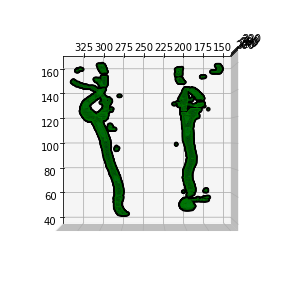

86.ca.seg.nrrd


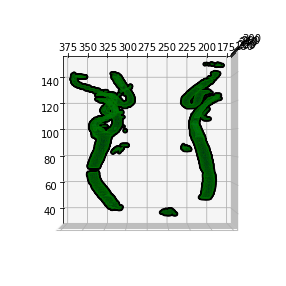

77.ca.seg.nrrd


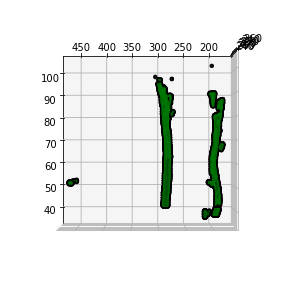

49.ca.seg.nrrd


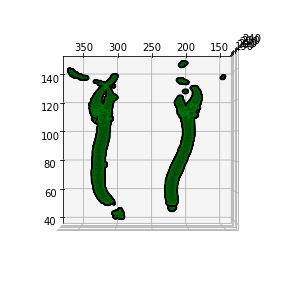

93.ca.seg.nrrd


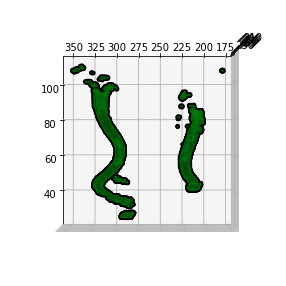

94.ca.seg.nrrd


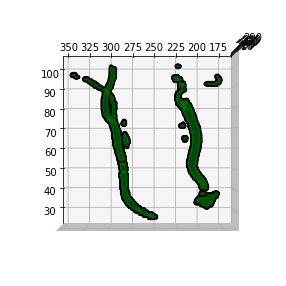

12.ca.seg.nrrd


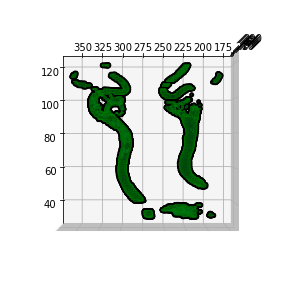

5.ca.seg.nrrd


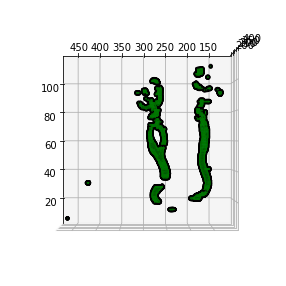

87.ca.seg.nrrd


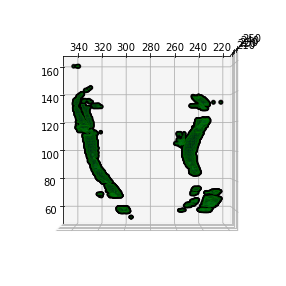

40.ca.seg.nrrd


73.ca.seg.nrrd


53.ca.seg.nrrd


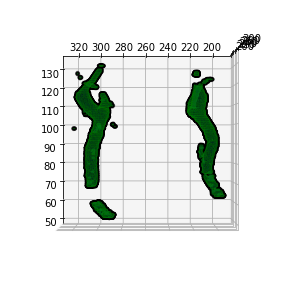

22.ca.seg.nrrd


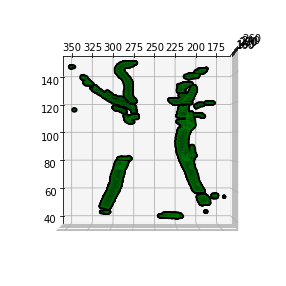

62.ca.seg.nrrd


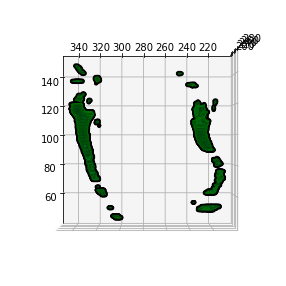

63.ca.seg.nrrd


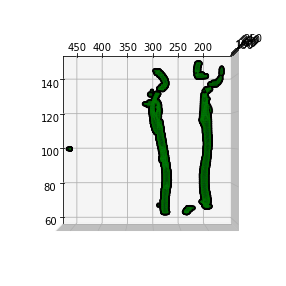

41.ca.seg.nrrd


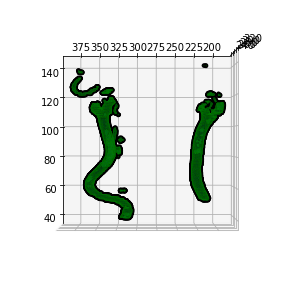

90.ca.seg.nrrd


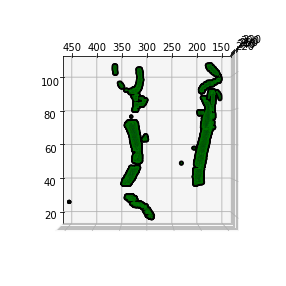

36.ca.seg.nrrd


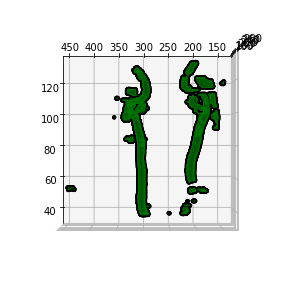

23.ca.seg.nrrd


10.ca.seg.nrrd


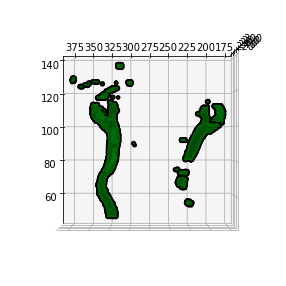

31.ca.seg.nrrd


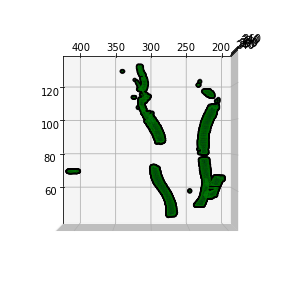

27.ca.seg.nrrd


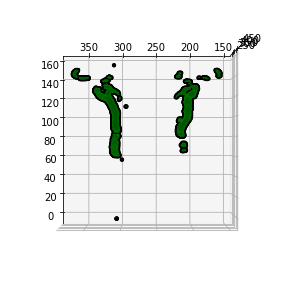

15.ca.seg.nrrd


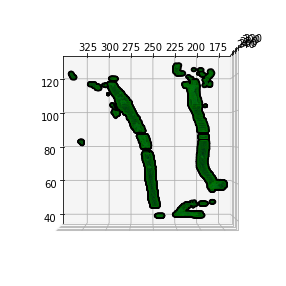

In [204]:
for i in range(28):
    d = CA_TEST + seg[i]
    data, header = nrrd.read(d)
    
    min_val, max_val = data.min(), data.max()
    isovalue = (min_val + max_val) / 2 
    
    if isovalue != 0:
        vertices, faces, normals, values = measure.marching_cubes(data, isovalue)
        print(seg[i])
        
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='black', s=10)

        mesh = Poly3DCollection(vertices[faces], linewidths=0.05, edgecolors='green', alpha=0.1)
        ax.add_collection3d(mesh)
        
        ax.view_init(elev=90, azim=180)

        plt.show()

In [215]:
def visualize_3d_image(ax, image_3d, title, elev=90, azim=180):
    min_val, max_val = image_3d.min(), image_3d.max()
    isovalue = (min_val + max_val) / 2

    if isovalue != 0:
        vertices, faces, normals, values = measure.marching_cubes(image_3d, isovalue)

        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='black', s=10)

        mesh = Poly3DCollection(vertices[faces], linewidths=0.05, edgecolors='green', alpha=0.1)
        ax.add_collection3d(mesh)

        ax.view_init(elev=elev, azim=azim)
        ax.set_title(title)
        ax.axis('off')

In [216]:
original_files = sorted([f for f in os.listdir(CA_TEST) if f.endswith('.nrrd') and int(f.split('.')[0]) in test_nums])

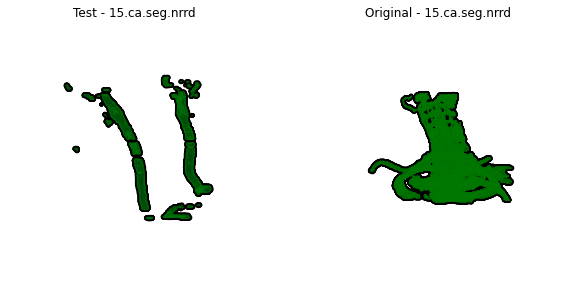

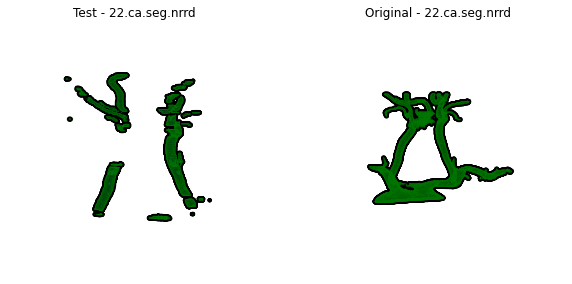

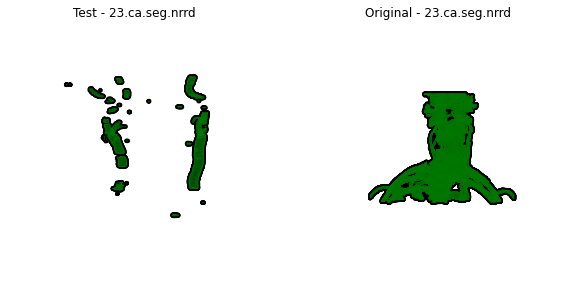

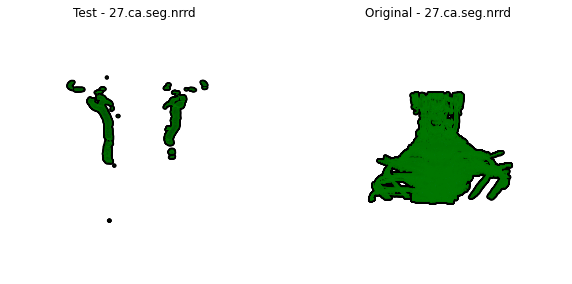

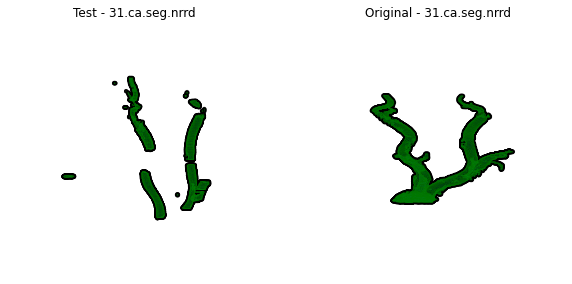

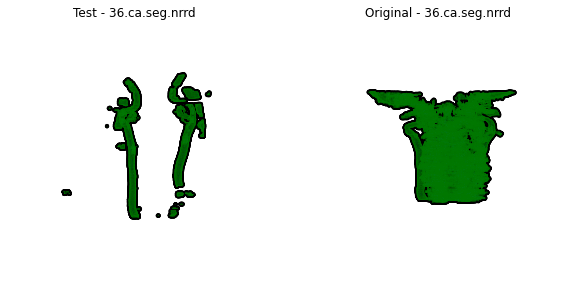

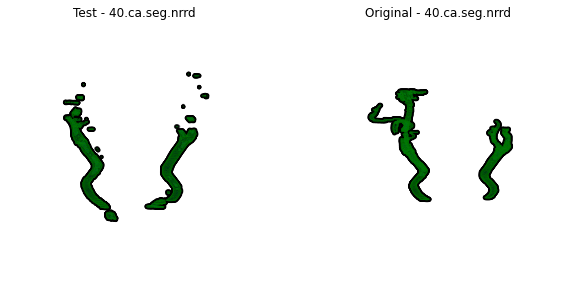

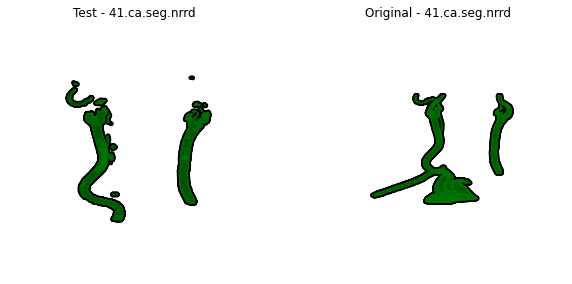

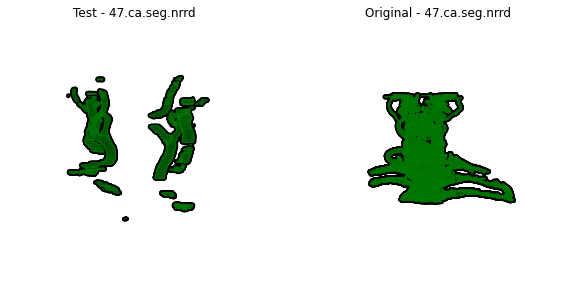

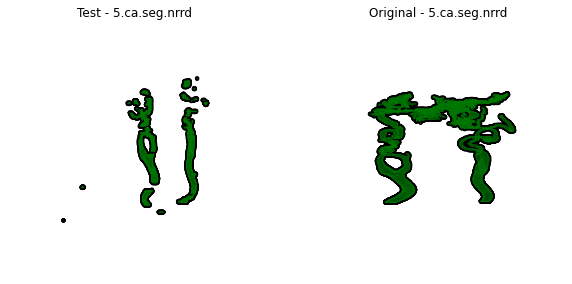

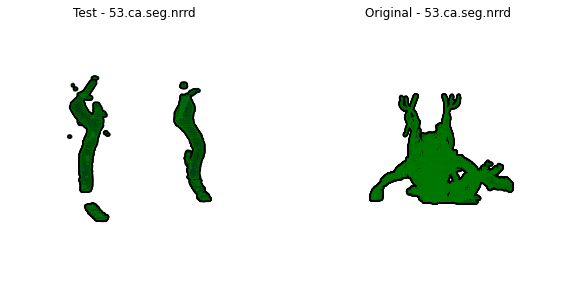

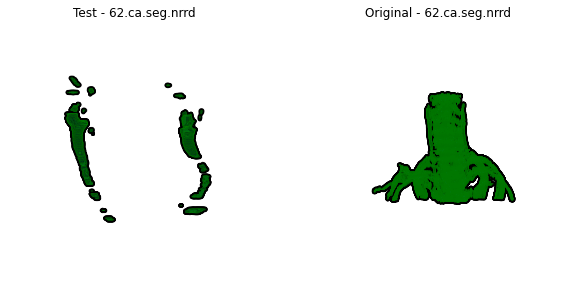

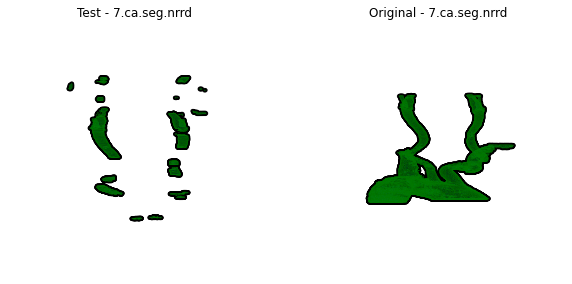

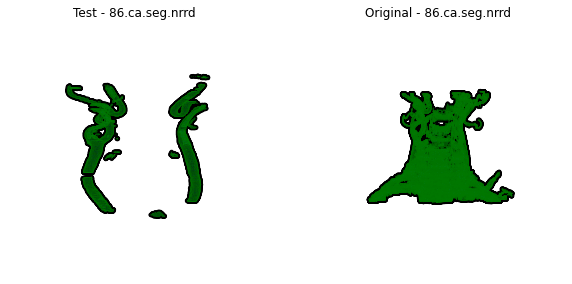

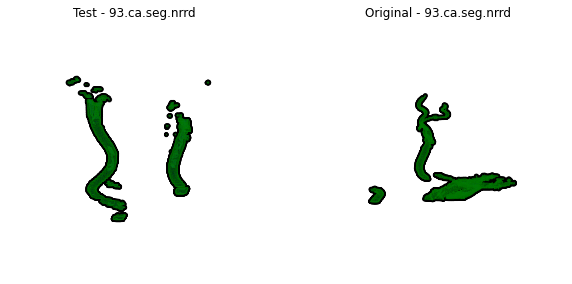

In [218]:
for file_name in original_files:
    original_path = os.path.join(CA_TEST, file_name)
    other_path = os.path.join(CAPATH, file_name)

    original_data, original_header = nrrd.read(original_path)
    other_data, other_header = nrrd.read(other_path)
    
    fig = plt.figure(figsize=(10, 5))

    # Visualize original data
    ax1 = fig.add_subplot(121, projection='3d')
    visualize_3d_image(ax1, original_data, f'Test - {file_name}')

    # Visualize corresponding data
    ax2 = fig.add_subplot(122, projection='3d')
    visualize_3d_image(ax2, other_data, f'Original - {file_name}', 0, 90)

    plt.show()